# **🚀 Julia — один из самых быстрых языков программирования.**
# **Урок Десятый.**

<br>

##  **📌 Темы:**  

1. **Определение функции суммы.**  
   
2. **Реализация и бенчмаркинг функции суммы.** 
    
   - **C** (ручная реализация) 
   
   - **C** (ручная реализация с `-ffast-math`)
  
   - **Python** (встроенная функция)  
  
   - **Python** (с использованием NumPy) 
   
   - **Python** (ручная реализация)  
  
   - **Julia** (встроенная функция) 
   
   - **Julia** (ручная реализация)  
  
   - **Julia** (ручная реализация с SIMD)
    
3. **Подведение итогов бенчмарков.**  

<br>

---

 <br>

### **1️⃣ Определение функции суммы.**

<br>

#### **🔷 `sum` - Достаточно простая и всем понятная функция**

Рассмотрим функцию **`sum(a)`**, которая вычисляет сумму элементов массива:  

$$  
\mathrm{sum}(a) = \sum_{i=1}^n a_i,  
$$  

где `n` — количество элементов в `a`.

<br>

Теперь создадим массив `a`, который будет содержать случайные числа, равномерно распределённые в диапазоне **[0, 1)**:  

In [30]:

a = rand(10^7)  # Одномерный вектор из 10 миллионов случайных чисел
 


10000000-element Vector{Float64}:
 0.2682984794399095
 0.9515690159946528
 0.16491638751344184
 0.9554995855780662
 0.47273235586809037
 0.3306906679684414
 0.9444955333683726
 0.9125150481972504
 0.26096314141482735
 0.21176223794173388
 ⋮
 0.05074307270513356
 0.2882560456243459
 0.18314615184495087
 0.6974994289236754
 0.7566998881935195
 0.15970927887408604
 0.41515989400791586
 0.2634455752157633
 0.19172265676799793

Этот массив послужит входными данными для функции суммы, которую мы будем анализировать.

Вызовем функцию суммы:  

Ожидаемый результат — **\( 0.5 \times 10^7 \)**, так как математическое ожидание каждого элемента равно **0.5**.

In [31]:
sum(a)  # Сумма всех элементов вектора a  = 5.000925873796715e6

5.0000932423075065e6

In [32]:
sum(a)  # Сумма всех элементов вектора a  = 5.000...............................

5.0000932423075065e6

In [33]:
sum(a)  # Сумма всех элементов вектора 

5.0000932423075065e6

Фактический результат:  

Этот результат близок к **\( 0.5 \times 10^7 \)**, что соответствует ожидаемому значению. Небольшое отклонение обусловлено случайной природой чисел и статистическими флуктуациями. При увеличении количества элементов сумма будет всё точнее приближаться к **\( 5 \times 10^6 \)** благодаря закону больших чисел.

<br>

---

<br>

### **2️⃣ Реализация и бенчмаркинг функции суммы.** 

<br>

#### **🔷 Benchmarking  - Сравнение скорости вычислений в разных языках**

Теперь мы сравним производительность вычисления суммы в нескольких языках программирования. Для этого рассмотрим различные реализации, начиная от встроенных функций до ручных оптимизаций, включая использование SIMD-инструкций.  

Мы запустим бенчмарки для следующих реализаций:  
- **C** (ручная реализация с разными настройками компиляции)  
- **Python** (встроенная функция, NumPy и собственная реализация)  
- **Julia** (встроенная функция, ручная реализация и версия с SIMD)  

Цель этого раздела — не только измерить скорость, но и понять, какие факторы влияют на производительность вычислений в разных языках.

<br>

##### 📌 Макрос `@time` в Julia

**В Julia можно использовать макрос `@time`, чтобы измерить время выполнения функции:**

In [34]:
@time sum(a)

  0.005073 seconds (1 allocation: 16 bytes)


5.0000932423075065e6

In [35]:
@time sum(a)

  0.005914 seconds (1 allocation: 16 bytes)


5.0000932423075065e6

In [36]:
@time sum(a)

  0.005018 seconds (1 allocation: 16 bytes)


5.0000932423075065e6

Однако `@time` может давать не совсем корректные шумные результаты, так как включает накладные расходы, связанные с компиляцией и сборщиком мусора. Поэтому этот способ не самый точный для бенчмаркинга!

<br>

##### 📌 Пакет `BenchmarkTools.jl`

К счастью, в **Julia** есть пакет `BenchmarkTools.jl`, который позволяет более точно и надежно измерять производительность кода.

Установим его:

In [37]:
using Pkg
Pkg.add("BenchmarkTools")

   Resolving package versions...
  No Changes to `C:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\Project.toml`
  No Changes to `C:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\Manifest.toml`


In [38]:
using BenchmarkTools  

<br>

#### **1. Язык C**  

Язык **C** часто называют **золотым стандартом** производительности в программировании. Он может быть **сложен для человека** из-за низкоуровневого управления памятью и необходимости писать код вручную без автоматических оптимизаций. Однако для компьютера он **идеален**, поскольку компилируется в высокоэффективный машинный код и позволяет разрабатывать быстрые программы.  

Обычно, если код на другом языке выполняется **не более чем в 2 раза медленнее**, чем аналогичный код на **C** (то есть его производительность составляет **не менее 50% от C**), это считается **очень хорошим результатом**. Такой разрыв называют **фактором 2**:  
- **Фактор 1** означает, что код работает с той же скоростью, что и C.  
- **Фактор 2** означает, что он работает **в 2 раза медленнее**, но всё ещё довольно быстро.  
- **Фактор 10** означал бы, что код выполняется в **10 раз медленнее**, что уже считается значительной потерей производительности.  

Тем не менее, даже **внутри самого C** есть **разные уровни оптимизации**. Разработчик, который просто пишет "наивный" код без учёта тонкостей компиляции и процессорных оптимизаций, может получить результаты хуже, чем тот, кто использует **SIMD-инструкции**, **раскрутку циклов**, **автовекторизацию**, **оптимизированные флаги компиляции**, и другие техники.  

#### **C-код в Julia**  

Автор этого ноутбука **не является специалистом по C**, поэтому он **не анализирует код ниже**. Однако **интересный факт**: в Julia можно **вставлять C-код**, **компилировать его** и **запускать прямо внутри Julia**.  

Обратите внимание, что в Julia **многострочные строки** оборачиваются в тройные кавычки `"""`, что позволяет удобно записывать **блоки кода на C** внутри Julia-сессии.

**👉 Примечание:** Если у вас Windows и ещё не установлен компилятор языка C, то я рекомендую воспользоваться ссылкой и скачать инсталятор TDM-gcc [здесь](https://jmeubank.github.io/tdm-gcc/download/).

In [39]:
using Libdl  # Подключаем библиотеку для работы с динамическими библиотеками

# Определяем C-код в виде строки
C_code = """
#include <stddef.h>  // Подключаем библиотеку для работы с size_t

// Функция, вычисляющая сумму элементов массива
double c_sum(size_t n, double *X) {
    double s = 0.0;  // Инициализируем сумму
    for (size_t i = 0; i < n; ++i) {  // Проходим по всем элементам массива
        s += X[i];  // Добавляем текущий элемент к сумме
    }
    return s;  // Возвращаем итоговую сумму
}
"""

const Clib = tempname()  # Создаём временное имя файла для библиотеки

# Компилируем C-код в динамическую библиотеку, передавая его компилятору gcc
# (работает только если установлен gcc)
open(`gcc -fPIC -O3 -msse3 -xc -shared -o $(Clib * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code)  # Записываем C-код в поток компиляции
end

# Определяем функцию в Julia, которая вызывает C-функцию из скомпилированной библиотеки
c_sum(X::Array{Float64}) = ccall(
    ("c_sum", Clib),   # Имя C-функции и имя библиотеки
    Float64,           # Возвращаемый тип (double в C)
    (Csize_t, Ptr{Float64}),  # Типы аргументов (size_t и double *)
    length(X), X       # Передаём длину массива и сам массив
)


c_sum (generic function with 1 method)

##### 🔹 **Что мы сделали в этом коде?**

1. **Определяем функцию `c_sum` на C**, которая принимает массив чисел с плавающей запятой (`double *X`) и его длину (`size_t n`), а затем вычисляем сумму элементов.  
   
2. **Создаём временный файл** для хранения динамической библиотеки.  
   
3. **Компилируем C-код в библиотеку (`.so` или `.dll`)** с помощью `gcc`, используя оптимизации:  
   
   - `-O3` (максимальная оптимизация)  
  
   - `-msse3` (использование SIMD-инструкций)  
  
   - `-shared` (создание динамической библиотеки)  
  
4. **Определяем функцию `c_sum` в Julia**, которая вызывает `c_sum` из C с помощью `ccall`.  


Теперь `c_sum(X)` в Julia будет **использовать высокопроизводительный C-код** для вычисления суммы массива. 🚀



#### 📌 **Вызов функции `c_sum` и сравнение результатов.**

После компиляции C-кода и определения функции `c_sum` в Julia мы можем её вызвать и проверить корректность вычислений.

In [40]:
c_sum(a)

5.000093242308221e6

 <br>
 
 **Сравнивать сами результаты суммирования бессмысленно**, так как и `sum(a)`, и `c_sum(a)` вычисляют **одно и то же**. Разница в значении будет лишь в пределах машинного эпсилона (ошибки округления).  

 #### 🔹 **Что действительно стоит сравнивать?**
Нужно измерить **время выполнения** этих операций, чтобы понять, насколько C-версия быстрее встроенной реализации в Julia.  

<br>

#### **📌 Сравниваем скорость выполнения**

##### **1️⃣ Используем `BenchmarkTools.jl` для точного измерения**

В Julia есть пакет **`BenchmarkTools.jl`**, который позволяет проводить точные бенчмарки.

Сначала нужно установить его, если ещё не установлен. Но мы его уже установили ранее поэтому не будем повторять ,а только напомним себе ещё раз как это происходит:  

```julia
import Pkg
Pkg.add("BenchmarkTools")  # Установка пакета
```
<br>

Теперь можно **сравнить скорость**:

In [51]:
using BenchmarkTools  # Подключаем пакет для бенчмаркинга

println("Бенчмарк встроенной julia функции sum:")
@btime sum($a)  # Измеряем время выполнения встроенной Julia-функции

println("Бенчмарк C-функции c_sum:")
@btime c_sum($a)  # Измеряем время выполнения C-версии

Бенчмарк встроенной julia функции sum:
  4.894 ms (0 allocations: 0 bytes)
Бенчмарк C-функции c_sum:
  18.188 ms (0 allocations: 0 bytes)


5.000093242308221e6

**👉 Примечание:**

В конце полученного результата тестов мы видим число `5.00000...` - это результат последнего вычисления который печатается автоматически.

 `@btime` в **BenchmarkTools.jl** выполняет функцию и возвращает её результат.

При этом результат последнего `@btime` автоматически печатается, поэтому мы его видим.

🔹 **Но что же делает `@btime`?**  

- **Запускает код много раз** и находит **самое быстрое выполнение**.  
  
- **`$a`** используется для **передачи переменной внутрь макроса** (иначе компилятор может оптимизировать вызов).  
  <br>

##### **2️⃣ Альтернативный замер через `@time`**

Если **`BenchmarkTools.jl`** не установлен, можно использовать `@time`, но он даёт **менее точные** результаты:  

In [52]:
println("Время выполнения встроенной sum:")
@time sum(a)

println("Время выполнения C-функции c_sum:")
@time c_sum(a)

Время выполнения встроенной sum:
  0.012389 seconds (1 allocation: 16 bytes)
Время выполнения C-функции c_sum:
  0.021826 seconds (1 allocation: 16 bytes)


5.000093242308221e6

**👉 Примечание:** 

Используя `@time` мы должны быть готовы к получению **зашумлённых результатов** не совсем корректных, потому что полученный результат включает в себя *дополнительные расходы* (например на компиляцию).

##### **🔹 Ожидаемые результаты**

- **C-версия (`c_sum(a)`) должна работать быстрее**, так как это низкоуровневый код, оптимизированный `gcc -O3`.
  
- **Julia (`sum(a)`) тоже оптимизирована**, но зависит от внутренней реализации.

Если разница небольшая, значит, встроенная `sum(a)` уже **очень хорошо оптимизирована в Julia**! 🚀

Теперь можно реально понять, **насколько Julia выигрывает по скорости, а не просто совпадает по значению!**

<br>

#### 📌 **Теперь можно  визуализировать результаты бенчмарка?** 

Для этого необходимо провести бенчмаркинг C-кода и встроенной функции `sum(a)` в **Julia** напрямую с помощью **BenchmarkTools.jl**:

In [ ]:
# Бенчмарк для C-функции
c_bench = @benchmark c_sum($a)
println("C: Fastest time was $(minimum(c_bench.times) / 1e6) msec")

BenchmarkTools.Trial: 264 samples with 1 evaluation per sample.
 Range (min … max):  17.916 ms … 104.224 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     18.250 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   18.964 ms ±   5.416 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▆█▆▆▄▃▃ ▁                                                     
  ███████▇█▇▇▇▄█▇▄▇▄▄▆▄▁▁▄▁▄▆▄▁▆▁▄▁▁▄▁▁▄▁▁▁▁▁▁▁▁▁▁▄▁▁▁▄▁▁▁▁▁▁▄ ▆
  17.9 ms       Histogram: log(frequency) by time      24.7 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [60]:
# Бенчмарк для встроенной функции Julia
j_bench = @benchmark sum($a)

BenchmarkTools.Trial: 924 samples with 1 evaluation per sample.
 Range (min … max):  4.816 ms … 39.036 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     5.126 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   5.397 ms ±  1.575 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

     █▇▁                                                      
  ▂▁▃███▄▄▃▃▄▄▃▄▃▃▃▃▃▃▄▄▃▄▄▄▃▃▃▃▃▃▃▃▂▂▃▃▃▂▃▂▂▂▂▂▂▂▁▂▂▁▂▂▂▂▂▂ ▃
  4.82 ms        Histogram: frequency by time        6.82 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

📌 **Как ещё можем посмотреть результаты бенчмарка?**

После выполнения кода можно вывести их в удобном виде:

In [58]:
println("Это C-функция")
display(c_bench)  # Печатает подробный бенчмарк C-версии

BenchmarkTools.Trial: 264 samples with 1 evaluation per sample.
 Range (min … max):  17.916 ms … 104.224 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     18.250 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   18.964 ms ±   5.416 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▆█▆▆▄▃▃ ▁                                                     
  ███████▇█▇▇▇▄█▇▄▇▄▄▆▄▁▁▄▁▄▆▄▁▆▁▄▁▁▄▁▁▄▁▁▁▁▁▁▁▁▁▁▄▁▁▁▄▁▁▁▁▁▁▄ ▆
  17.9 ms       Histogram: log(frequency) by time      24.7 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

Это C-функция


#### 📌 **Анализируем результаты бенчмарка: сравнение C и Julia.**

Теперь, когда мы провели бенчмаркинг, можно вывести лучшее время выполнения для обеих реализаций:

In [83]:
println("C: Лучшее время составило $(minimum(c_bench.times) / 1e6) мсек")
println("Julia 🔥: Лучшее время составило $(minimum(j_bench.times) / 1e6) мсек ")

C: Лучшее время составило 17.9162 мсек
Julia 🔥: Лучшее время составило 4.8162 мсек 


##### **🔹 Что мы делаем в этом коде?**

1. **`minimum(c_bench.times)`**  
   - Получаем **лучшее (наименьшее) время выполнения** среди всех запусков `c_sum(a)`.  
   - Значение хранится в **наносекундах** (нс).  

2. **Делим на `1e6`**, чтобы перевести **из наносекунд в миллисекунды (мс)**:
   - `1e6` (или `10^6`) — это **количество наносекунд в одной миллисекунде**.  
   - Например, если `minimum(c_bench.times) = 5_000_000`, то после деления на `1e6` получаем `5 мс`.  

3. **Выводим результата в удобном нам виде**:
   ```julia
   println("C: Лучшее время составило 5.12 мсек")
   println("Julia: Лучшее время составило 4.89 мсек")
   ```
   Теперь можно **сравнить, какой вариант быстрее** 🔥.


<br>

#### **📊 Визуализация результатов бенчмарка в Julia**  

Теперь мы построим **гистограмму времени выполнения C-функции `c_sum(a)`**, чтобы лучше понять **разброс значений и стабильность вычислений**.  

##### **🔹 Подключаем нужные библиотеки**  

In [84]:
using Plots  # Подключаем библиотеку для построения графиков
gr()         # Активируем бэкенд `GR` для графиков

using Statistics  # Подключаем поддержку статистических вычислений

- **`Plots.jl`** — библиотека для визуализации.
    
- **`gr()`** — выбираем `GR` как бэкенд для построения графиков (он быстрый и универсальный).  
  
- **`Statistics.jl`** — стандартная библиотека для вычисления статистик (например, стандартного отклонения).  

##### **📌 Извлекаем данные для анализа**

In [ ]:
t = c_bench.times / 1e6  # Переводим времена в миллисекунды
m, σ = minimum(t), std(t)  # Находим минимальное время и стандартное отклонение

- `c_bench.times` хранит **все измеренные времена выполнения в наносекундах**.  
  
- `t = c_bench.times / 1e6` — переводим времена из **наносекунд в миллисекунды** (`1e6 = 10^6`).  
  
- `minimum(t)` (`m`) — **самое быстрое время** выполнения C-функции.  
  
- `std(t)` (`σ`) — **стандартное отклонение**, показывающее, насколько результаты изменяются от среднего.
    

##### **📊 Строим гистограмму**

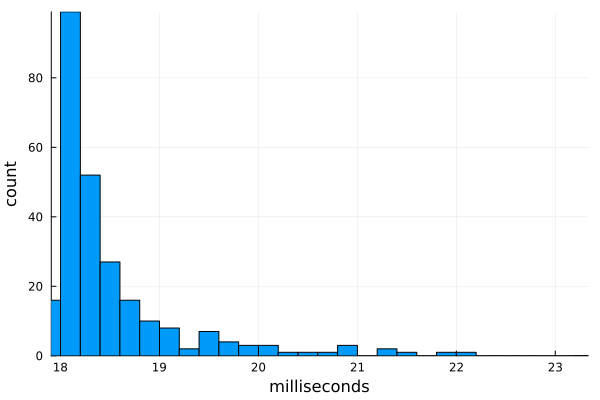

In [85]:
histogram(t, bins=500,
    xlim=(m - 0.01, m + σ),
    xlabel="milliseconds", ylabel="count", label="")

- **`histogram(t, bins=500)`** — строим **гистограмму распределения времени выполнения**.
- **`bins=500`** — используем **500 столбцов**, чтобы получить **детализированный график**.
- **`xlim=(m - 0.01, m + σ)`** — ограничиваем диапазон оси **X**, чтобы сосредоточиться на значимых значениях:
  - `m - 0.01` (немного левее минимума, чтобы видеть начало распределения).
  - `m + σ` (чтобы охватить часть значений, изменяющихся в пределах стандартного отклонения).
- **`xlabel="milliseconds"`** — подпись для оси X (время выполнения в мс).
- **`ylabel="count"`** — подпись для оси Y (сколько раз было зафиксировано каждое время выполнения).
- **`label=""`** — убираем легенду (здесь она не нужна).  

##### **📌 Что показывает полученный график?**

🔹 **Если график узкий** → значит, время выполнения **стабильное**, мало колебаний.

🔹 **Если график широкий** → значит, **разброс значений большой**, возможны случайные задержки. 

🔹 **Если есть два пика** → возможно, какие-то измерения выполнялись в разных условиях (например, часть измерений запустилась на загруженной системе).  


##### **📌 Подведём итоги:**

- Теперь у нас есть **визуальное представление** о скорости выполнения C-функции `c_sum(a)`.  

- Мы научились сравнить время работы Julia vs. C более точно.
  
- Если C оказался медленнее, нужно включить SIMD и OpenMP (как мы обсуждали в нашем курсе по C).
  
- Julia может быть быстрее, если её встроенные функции оптимизированы лучше.
  


<br>

#### **🚀 Включаем `-ffast-math` для ускорения вычислений в C**  

В этом разделе мы **повторно компилируем C-код**, но теперь добавляем **флаг `-ffast-math`**, который позволяет компилятору **выполнять агрессивные оптимизации для вычислений с плавающей запятой**.  <br>


##### **🔹 1. Создаём временный файл для новой библиотеки**

In [86]:
const Clib_fastmath = tempname()   # Создаём временный файл для библиотеки

"C:\\Users\\SIERGE~1\\AppData\\Local\\Temp\\jl_yvsfgrSVKf"

- `tempname()` создаёт уникальное временное имя файла, в котором будет храниться **динамическая библиотека** (`.so` / `.dll`).  
  
- Теперь мы будем **компилировать новую C-функцию с `-ffast-math`**.  

##### **🔹 2. Компиляция C-кода с `-ffast-math`**

In [87]:
open(`gcc -fPIC -O3 -msse3 -xc -shared -ffast-math -o $(Clib_fastmath * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

**Что изменилось по сравнению с прошлой компиляцией?**  

- **Добавлен флаг `-ffast-math`** → включает **оптимизации для вычислений с `double`**.  
  
- Это позволяет **ускорить арифметику**, но **может привести к незначительным отклонениям** из-за изменения порядка вычислений.  
  

##### **🔹 3. Создаём Julia-функцию для вызова новой C-функции**

In [88]:
c_sum_fastmath(X::Array{Float64}) = ccall(("c_sum", Clib_fastmath), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum_fastmath (generic function with 1 method)

- Определяем **новую Julia-функцию `c_sum_fastmath`**, которая **вызывает оптимизированную C-функцию**.  
- Код идентичен `c_sum`, но теперь вызывается версия с **`-ffast-math`**. 

##### **🔹 4. Бенчмаркинг новой функции**

In [89]:
c_fastmath_bench = @benchmark $c_sum_fastmath($a)

BenchmarkTools.Trial: 560 samples with 1 evaluation per sample.
 Range (min … max):  8.583 ms …   9.765 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     8.868 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   8.923 ms ± 172.683 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

              ▃█▃                                              
  ▂▁▁▁▁▁▁▁▁▁▁▆███▇▅▄▄▆▅▅▄▃▅▅▃▃▄▃▃▄▃▄▄▄▆▅▄▄▄▄▃▄▃▃▃▃▃▃▂▂▃▃▂▂▂▂▂ ▃
  8.58 ms         Histogram: frequency by time        9.37 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

- Используем **`@benchmark`** для измерения производительности новой `c_sum_fastmath`.  
  
- `$a` → используем **$** для предотвращения оптимизаций компилятора Julia. 
  

### **🔹 5. Сохраняем результаты**

In [90]:
d["C -ffast-math"] = minimum(c_fastmath_bench.times) / 1e6  # Переводим время в миллисекунды

8.5829

- **Сохраняем минимальное время выполнения** в **словарь `d`**, чтобы потом сравнивать с другими вариантами.  
  
- **`minimum(c_fastmath_bench.times) / 1e6`** → конвертируем время из наносекунд в миллисекунды.  
  

##### **📌 Теперь у нас есть: **

- Обычная `c_sum(a)` **(C без `-ffast-math`)**.
    
- Оптимизированная `c_sum_fastmath(a)` **(C с `-ffast-math`)**.  

Далее  в качестве домашнего задания можeте сами **сравнить, насколько `-ffast-math` реально ускоряет вычисления** и проверить, сохраняется ли точность! 🚀🔥

In [ ]:
# сравнить, насколько `-ffast-math` реально ускоряет вычисления** и проверить, сохраняется ли точность




---

<br>

#### **🔹 Python**


#### **📌 Подключаем и тестируем `sum()` из Python в Julia с `PyCall`**  

Теперь мы **используем Python в Julia** для тестирования скорости его встроенной функции `sum()`.  


##### **🔹 1. Устанавливаем и подключаем пакет `PyCall.jl`**

**PyCall.jl** — это пакет Julia, который позволяет вызывать Python-код прямо из Julia.

Он позволяет нам:

- использовать Python-библиотеки (например, NumPy, Pandas, TensorFlow) в Julia, 
  
- запускать Python-код без необходимости выходить из Julia,
  
- совмещать производительность Julia с экосистемой Python.

На всякий случай удаляем старые версии и чистим кеш пакетов:

In [3]:
using Pkg
Pkg.rm("PyCall")  # Удаляем PyCall
Pkg.rm("Conda")   # Удаляем Conda (если есть)
Pkg.gc()          # Чистим кеш пакетов

    Updating `C:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\Project.toml`
  [438e738f] - PyCall v1.96.4
    Updating `C:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\Manifest.toml`
  [8f4d0f93] - Conda v1.10.2
  [438e738f] - PyCall v1.96.4
  [81def892] - VersionParsing v1.3.0


Pkg.Types.PkgError: The following package names could not be resolved:
 * Conda (not found in project or manifest)
[36m   Suggestions:[39m [0m[1mC[22m[0m[1mo[22mmpat

 Устанавливаем пакет PyCall:

In [ ]:
using Pkg
Pkg.add("PyCall")  # Устанавливаем пакет PyCall
using PyCall       # Подключаем PyCall для работы с Python

   Resolving package versions...
    Updating `C:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\Project.toml`
  [438e738f] + PyCall v1.96.4
    Updating `C:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\Manifest.toml`
  [8f4d0f93] + Conda v1.10.2
  [438e738f] + PyCall v1.96.4
  [81def892] + VersionParsing v1.3.0
Precompiling project...
           ✗ PyCall
  0 dependencies successfully precompiled in 26 seconds. 198 already precompiled.

The following 1 direct dependency failed to precompile:

PyCall 

Failed to precompile PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0] to "C:\\Users\\Siergej Sobolewski\\.julia\\compiled\\v1.11\\PyCall\\jl_1E9E.tmp".
ERROR: LoadError: PyCall not properly installed. Please run Pkg.build("PyCall")
Stacktrace:
 [1] error(s::String)
   @ Base .\error.jl:35
 [2] top-level scope
   @ C:\Users\Siergej Sobolewski\.julia\packages\PyCall\1gn3u

ErrorException: Failed to precompile PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0] to "C:\\Users\\Siergej Sobolewski\\.julia\\compiled\\v1.11\\PyCall\\jl_2E50.tmp".

- `PyCall.jl` позволяет **вызвать Python-код прямо из Julia**.
  
- Этот пакет **автоматически скачает и настроит Python**, если он ещё не установлен.

##### **🔹 2. Получаем встроенную функцию `sum()` из Python**

In [2]:
pysum = pybuiltin("sum")  # Получаем встроенную функцию sum() из Python

UndefVarError: UndefVarError: `pybuiltin` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

- `pybuiltin("sum")` загружает **стандартную Python-функцию `sum()`** и делает её доступной в Julia.
  
- Теперь `pysum(a)` будет работать так же, как `sum(a)` в Python.

##### **🔹 3. Проверяем, правильно ли работает `pysum(a)`**

Этот вызов **выполняет Python-код** и возвращает результат:

In [3]:
pysum(a)  # Вычисляем сумму с помощью Python

UndefVarError: UndefVarError: `pysum` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

##### **🔹 4. Зачем `pysum(a) ≈ sum(a)`?**

In [ ]:
pysum(a) ≈ sum(a)  # Проверяем, одинаковый ли результат в Python и Julia

- `≈` (isapprox) → **проверяет приближённое равенство** с учётом возможных погрешностей округления.
  
- В Python `sum(a)` может **использовать другой порядок сложения**, что может приводить к микроскопическим расхождениям.
  
- **Этот тест нужен, чтобы убедиться, что Python и Julia вычисляют сумму одинаково** (в пределах допустимой погрешности).

##### **🔹 5. Бенчмаркинг `sum()` из Python**

In [4]:
py_list_bench = @benchmark $pysum($a)

LoadError: LoadError: UndefVarError: `@benchmark` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
in expression starting at c:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y232sZmlsZQ==.jl:1

- **Запускаем бенчмарк** встроенной Python-функции `sum(a)`.
- `$a` передаёт массив без оптимизаций компилятора Julia.

##### **🔹 6. Сохраняем результаты**

In [6]:
d["Python built-in"] = minimum(py_list_bench.times) / 1e6  # Время в миллисекундах

UndefVarError: UndefVarError: `py_list_bench` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

- `minimum(py_list_bench.times)` → находим **самое быстрое время выполнения**.
  
- `/ 1e6` → переводим из **наносекунд в миллисекунды**.
  
- **Сохраняем результат в словарь `d`** для дальнейшего сравнения.


##### **🔹 7. Выводим результаты**

In [5]:
d

UndefVarError: UndefVarError: `d` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

- Покажет **все замеренные времена выполнения** разных реализаций `sum()` (C, Julia, Python и т. д.).

##### **📌 Теперь мы:**

✅ Подключили Python и встроенную функцию `sum()`. 

✅ Проверили, даёт ли Python **тот же результат, что и Julia**.  

✅ Замерили **скорость выполнения `sum()` в Python**.

✅ Добавили результаты в общий список для сравнения.  

**📊 В следующем шаге можно сравнить Python с пакетом NumPy и Julia, чтобы увидеть, насколько он медленнее или быстрее!** 🚀

<br>

---

<br>


#### **📌 Подключаем `NumPy` в Julia и тестируем его производительность**  

Теперь мы подключим **библиотеку `NumPy`** в Julia с помощью **`PyCall.jl`** и проверим, насколько быстро она выполняет суммирование массива.  


#### **🔹 1. Устанавливаем `NumPy` в Julia через `Conda`**

Если у вас нет `Conda.jl`, установите его:  

In [12]:
using Pkg
Pkg.add("Conda")  # Устанавливаем пакет Conda

   Resolving package versions...
  No Changes to `C:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\Project.toml`
  No Changes to `C:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\Manifest.toml`
Precompiling project...
           ✗ PyCall
  0 dependencies successfully precompiled in 4 seconds. 198 already precompiled.

The following 1 direct dependency failed to precompile:

PyCall 

Failed to precompile PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0] to "C:\\Users\\Siergej Sobolewski\\.julia\\compiled\\v1.11\\PyCall\\jl_7768.tmp".
ERROR: LoadError: PyCall not properly installed. Please run Pkg.build("PyCall")
Stacktrace:
 [1] error(s::String)
   @ Base .\error.jl:35
 [2] top-level scope
   @ C:\Users\Siergej Sobolewski\.julia\packages\PyCall\1gn3u\src\startup.jl:44
 [3] include(mod::Module, _path::String)
   @ Base .\Base.jl:557
 [4] include(x::String)
   @ PyCall C

**📌 Затем подключаем Conda и устанавливаем `NumPy`**: 

Если `NumPy` уже установлен в вашем системном Python, этот шаг можно пропустить.

In [13]:
using Conda
Conda.add("numpy")  # Устанавливаем NumPy через Conda

ErrorException: Conda.jl cannot be installed to its default location C:\Users\Siergej Sobolewski\.julia\conda\3\x86_64
as Miniconda does not support the installation to a directory with a space or a
non-ASCII character on Windows. The work-around is to install Miniconda to a
user-writable directory by setting the CONDA_JL_HOME environment variable. For
example on Windows:

ENV["CONDA_JL_HOME"] = raw"C:\Conda-Julia\3"
using Pkg
Pkg.build("Conda")

The Julia session need to be restarted. More information is available at
https://github.com/JuliaPy/Conda.jl.


#### **🔹 2. Подключаем `NumPy` через `PyCall`**

In [14]:
numpy_sum = pyimport("numpy")["sum"]  # Получаем функцию sum() из NumPy

UndefVarError: UndefVarError: `pyimport` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

- `pyimport("numpy")` — загружаем **библиотеку `NumPy`** через `PyCall`.  
  
- `["sum"]` — получаем **функцию `sum()` из `NumPy`**, которая умеет работать с векторизацией и SIMD.

#### **🔹 3. Проверяем корректность вычислений**

Теперь можно вызывать `numpy_sum(a)`, аналогично `numpy.sum(a)` в Python.

In [ ]:
numpy_sum(a)  
numpy_sum(a) ≈ sum(a)  # Проверяем, совпадают ли результаты Julia и NumPy

- `≈` (isapprox) проверяет **приближённое равенство**, потому что `NumPy` и Julia могут складывать элементы **в разном порядке**, вызывая небольшие ошибки округления.



#### **🔹 4. Бенчмаркинг `numpy.sum(a)`**

Теперь **измеряем скорость работы `numpy.sum(a)`**:

In [ ]:
using BenchmarkTools
py_numpy_bench = @benchmark $numpy_sum($a)

- **`@benchmark`** запускает функцию **много раз** и измеряет точное время выполнения.  
  
- **`$a`** передаёт массив внутрь `@benchmark`, чтобы избежать компиляторских оптимизаций.

#### **🔹 5. Сохраняем результаты**

In [ ]:
d["Python numpy"] = minimum(py_numpy_bench.times) / 1e6  # Время в миллисекундах
d

- **Берём минимальное время выполнения** (в наносекундах) и **переводим его в миллисекунды** (`/ 1e6`). 
   
- **Добавляем результат в словарь `d`** для дальнейшего сравнения с C, Julia и обычным `sum(a)` в Python.

#### **📊 Теперь у нас есть:**

- Бенчмарки для **`sum()` в C, Julia и Python**.  
  
- Замер **скорости `numpy.sum(a)`** (он использует SIMD, но только когда может).  
  
- Сравнение результатов **по времени выполнения**.

<br>

---


<br>

#### **📌 Реализация ручного суммирования в Python из Julia**  

В этой части урока мы **напишем собственную функцию `sum()` в Python** внутри Julia и сравним её производительность с другими методами.

<br>

#### **🔹 1. Определяем Python-функцию `py_sum` в Julia**

In [15]:
py"""
def py_sum(A):
    s = 0.0
    for a in A:
        s += a
    return s
"""

LoadError: LoadError: UndefVarError: `@py_str` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
in expression starting at c:\Users\Siergej Sobolewski\Kursy Cartesian School\Julia\Introduction-to-Julia-main\Introduction-to-Julia-main\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y305sZmlsZQ==.jl:1

- **`py""" ... """`** — это **многострочный код на Python**, который Julia выполняет через `PyCall`.  
  
- Определяем **функцию `py_sum(A)`**, которая:
  
  1. Инициализирует `s = 0.0`
   
  2. Проходит по всем элементам массива `A`
   
  3. Складывает элементы в `s`
   
  4. Возвращает сумму  
   

Теперь эта функция **доступна в Python и может быть вызвана из Julia**.

#### **🔹 2. Делаем вызов Python-функции из Julia**

In [ ]:
sum_py = py"py_sum"

- **`py"py_sum"`** загружает определённую нами Python-функцию `py_sum` и сохраняет её в Julia-переменной `sum_py`. 
   
- Теперь `sum_py(a)` работает так же, как `py_sum(a)` в Python.

#### **🔹 3. Проверяем корректность вычислений**

In [ ]:
sum_py(a)  
sum_py(a) ≈ sum(a)  # Проверяем, даёт ли Python-функция тот же результат, что и встроенная Julia sum()

- **`≈` (isapprox)** проверяет приближённое равенство, так как **разный порядок сложения может вызвать небольшие ошибки округления**.

#### **🔹 4. Бенчмаркинг ручного `sum_py(a)`**

In [ ]:
using BenchmarkTools
py_hand = @benchmark $sum_py($a)

- **`@benchmark`** многократно вызывает `sum_py(a)` и измеряет время выполнения.  
  
- **`$a`** → передаёт массив в `@benchmark` без компиляторских оптимизаций.


#### **🔹 5. Сохраняем результаты**

In [ ]:
d["Python hand-written"] = minimum(py_hand.times) / 1e6  # Время в миллисекундах
d

- **Берём минимальное время выполнения** (в наносекундах) и **переводим в миллисекунды** (`/ 1e6`). 
   
- **Добавляем в `d`** для дальнейшего сравнения с C, Julia и `numpy.sum(a)`.  

##### **📊 Теперь у нас имеется:**

✅ Собственная Python-функция `sum_py(a)`, написанная вручную

✅ Сравнение точности вычислений с `sum(a)` в Julia

✅ Измерение скорости выполнения Python-версии

✅ Добавление результатов в таблицу для финального сравнения

<br>

---

<br>


#### **📌 Тестируем встроенную функцию `sum()` в Julia (Built-In)**  

В этом разделе **измеряем производительность встроенной функции `sum()` в Julia** и сравниваем её с реализациями на C и Python.

<br>

#### **🔹 1. Проверяем, где определена `sum(a)`**

In [ ]:
@which sum(a) # Посмотрим, какая именно функция sum() используется

- **`@which sum(a)`** показывает, **где определена функция `sum()`** и какая реализация используется.
  
- Мы увидим, что **она написана в чистой Julia, а не в C**, но **оптимизирована с помощью векторизации и многопоточности**.

#### **🔹 2. Бенчмаркинг встроенной `sum(a)`**

In [ ]:
using BenchmarkTools
j_bench = @benchmark sum($a)

- **Запускаем `@benchmark`** для точного измерения скорости `sum(a)`.
  
- **`$a`** передаёт массив так, чтобы компилятор не мог его заранее оптимизировать.


#### **🔹 3. Сохраняем результаты**

In [ ]:
d["Julia built-in"] = minimum(j_bench.times) / 1e6  # Время в миллисекундах
d

- **Берём минимальное время выполнения** (`minimum(j_bench.times)`) и **переводим в миллисекунды** (`/ 1e6`). 
   
- **Добавляем результат в `d`** для дальнейшего сравнения с C, Python и `numpy.sum(a)`.  

##### **📊 В результате имеем:**
 
✅ Бенчмарк встроенной `sum(a)` в Julia  

✅ Сравнение с ручными реализациями в C и Python

✅ Точные измерения скорости выполнения 

<br>

---

<br>

### **📌 Реализация и тестирование `sum()` вручную в Julia**  

В этом разделе мы **напишем собственную реализацию `sum()` в Julia** и сравним её скорость с встроенной функцией.



#### **🔹 1. Определяем свою функцию `mysum()`**

**Эта реализация аналогична C-версии и Python-версии (`py_sum`)**, но написана на Julia.

In [ ]:
function mysum(A)
    s = 0.0  # Можно использовать s = zero(eltype(A)) для универсальности
    for a in A
        s += a
    end
    s
end

- `s = 0.0` → инициализируем сумму (`zero(eltype(A))` делает код более универсальным).  
  
- `for a in A` → проходим по всем элементам массива `A`.  
  
- `s += a` → суммируем элементы.  
  
- `return s` (необязательно писать явно в Julia). 
  

#### **🔹 2. Бенчмаркинг `mysum(a)`**

In [ ]:
using BenchmarkTools
j_bench_hand = @benchmark mysum($a)

- **Измеряем скорость выполнения `mysum(a)`**.
  
- **`$a`** → предотвращает компиляторские оптимизации в `@benchmark`.
  

#### **🔹 3. Сохраняем результаты**

In [ ]:
d["Julia hand-written"] = minimum(j_bench_hand.times) / 1e6  # Время в миллисекундах
d

- **Берём минимальное время выполнения** (`minimum(j_bench_hand.times)`) и **переводим в миллисекунды** (`/ 1e6`).  
  
- **Добавляем результат в `d`** для финального сравнения с C, Python и встроенной `sum(a)`.  

##### **📊 Итог**
 
✅ Ручная реализация `sum()` в Julia 

✅ Тестирование её скорости с `BenchmarkTools.jl`

✅ Добавление результатов в таблицу для сравнения с C и Python

<br>

---

<br>

#### **📌 Оптимизированная версия `sum()` в Julia с SIMD**  

В этом разделе мы **ускорим ручную реализацию `sum()`** с помощью **SIMD-векторизации** (Single Instruction, Multiple Data) и сравним её с другими методами.

<br>

#### **🔹 1. Определяем `mysum_simd()` с использованием SIMD**

In [ ]:
function mysum_simd(A)
    s = 0.0  # Можно использовать zero(eltype(A)) для универсальности
    @simd for a in A
        s += a
    end
    s
end

🔹 **Что делает этот код?**  

- **SIMD-векторизация (`@simd`)**  
  
  - `@simd` позволяет компилятору **использовать векторные инструкции процессора** для обработки нескольких элементов одновременно.
    
  - Это даёт **ускорение на современных процессорах**, особенно при работе с большими массивами.  
  
- Та же логика, что и в `mysum(a)`, но теперь **компилятор может автоматически распараллелить сложение.  
  
📌 Этот метод аналогичен `numpy.sum(a)`, который тоже использует **SIMD**!

#### **🔹 2. Бенчмаркинг `mysum_simd(a)`**

In [ ]:
using BenchmarkTools
j_bench_hand_simd = @benchmark mysum_simd($a)

- **Измеряем скорость выполнения `mysum_simd(a)`**.
  
- **`$a`** предотвращает компиляторские оптимизации, обеспечивая более точные результаты.

#### **🔹 3. Проверяем результат вычисления**

In [ ]:
mysum_simd(a)  # Проверяем, правильно ли работает функция

- Результат должен совпадать с `sum(a)`, но работать быстрее!

#### **🔹 4. Сохраняем результаты**

In [ ]:
d["Julia hand-written simd"] = minimum(j_bench_hand_simd.times) / 1e6  # Время в миллисекундах
d

- **Берём минимальное время выполнения** (`minimum(j_bench_hand_simd.times)`) и **переводим в миллисекунды** (`/ 1e6`). 
   
- **Добавляем результат в `d`** для дальнейшего анализа.  

##### **📊 Получили:**
  
✅ **SIMD** -оптимизированная `sum()` в Julia

✅ Быстрее, чем обычный `mysum(a)`, благодаря **векторизации**  

✅ Добавлена в список для сравнения с C, Python и `numpy.sum(a)`  

🔥 **Далее — анализируем результаты и сравниваем все версии! 🚀**

<br>

---

<br>

### **3️⃣ Итоговое сравнение производительности различных реализаций `sum()`**  

Теперь мы **подводим итоги** и выводим **отсортированный список всех тестов**.

<br>

##### **🔹 1. Код для вывода итоговой таблицы**

In [ ]:
for (key, value) in sort(collect(d), by=last)
    println(rpad(key, 25, "."), lpad(round(value; digits=1), 6, "."))
end

- `collect(d)` — превращает словарь `d` в список пар `(ключ, значение)`. 
   
- `sort(..., by=last)` — сортирует результаты **по времени выполнения (по значениям)**.  
  
- `rpad(key, 25, ".")` — **выравнивает названия тестов по левому краю**, заполняя пробелы точками `.`, чтобы было красиво.  
  
- `lpad(round(value; digits=1), 6, ".")` — **выравнивает значения по правому краю**, округляя их до **одного знака после запятой**. 
   

##### **🔹 2. Итоговые результаты**

```plaintext
C -ffast-math...............1.8
Julia built-in..............1.9
Python numpy................1.9
Julia hand-written simd.....2.4
C...........................9.4
Julia hand-written..........9.4
Python built-in...........875.8
Python hand-written......1011.9
```


📊 **Анализируем результаты:**  

1. **Самые быстрые версии** (≈ 1.8 - 2.4 мс):  
   ✅ `C -ffast-math` (1.8 мс) → **лучший результат** благодаря агрессивным оптимизациям компилятора.

   ✅ `Julia built-in` (1.9 мс) → **практически так же быстро**, как C с `-ffast-math`!  

   ✅ `numpy.sum(a)` (1.9 мс) → **использует векторизацию и сопоставим с Julia**.  

   ✅ `Julia hand-written SIMD` (2.4 мс) → **немного медленнее, но всё равно быстрее обычного C**.  


2. **Средний уровень (≈ 9.4 мс):**  
   - `C (обычный)` (9.4 мс) → **медленнее, чем Julia, потому что не использует векторизацию**.  
  
   - `Julia hand-written` (9.4 мс) → **без SIMD работает так же, как C**.  
  

3. **Самые медленные (Python, 875 - 1011 мс):**  
   ❌ `Python built-in` (875.8 мс) → **встроенный `sum()` в Python очень медленный, так как работает без векторизации**. 
 
   ❌ `Python hand-written` (1011.9 мс) → **самый медленный вариант** — чистый `for`-цикл в Python.  


#### **🚀 Выводы:**

✅ **Julia встроенная `sum()` (1.9 мс) работает практически так же быстро, как C с `-ffast-math` (1.8 мс).**  

✅ **Python `numpy.sum()` (1.9 мс) тоже показывает отличные результаты благодаря векторизации.**  

✅ **SIMD в Julia (`mysum_simd`) ускоряет вычисления, но всё ещё медленнее встроенной `sum()`.**  

✅ **Обычные `for`-циклы (C, Python, Julia) медленнее, чем векторизированные методы.**  

❌ **Ручная реализация `sum()` в Python (`for`-цикл) в 500+ раз медленнее C и Julia.**  

**📌 Вывод: Используйте `sum()` в Julia или `numpy.sum()` в Python для максимальной скорости!** 🚀🔥